In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# The index_col parameter specifies which column in the CSV file should be used as the index for the data.
# Setting index_col=0 means that the first column in the CSV file will be used as the index.
# This is useful when the data contains a unique identifier for each row, such as a property number or a customer ID.
# Using index_col=0 avoids creating a new index and instead uses an existing column as the index.

df_data = pd.read_csv('house_prices_data_cleaned.csv', index_col=0)
df_data.rename(columns={'price_euro': 'price'}, inplace=True)
df_data.head()

,price,number_rooms,area_m2,bathrooms,floor_number,description,Reference and listing Date,contract,type,total building floors,...,heating,Air conditioner,Energy Efficiency,city,neighborhood,street,URL,with_disabled_access,with_lift,listing Date
0,289000,3,100,1,4.0,Si propone in vendita in esclusiva un ampio ap...,CNB6 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,7.0,...,"Central, with radiators, powered by methane","Central, cold",F≥ 175 kWh/m² year,Milan,Baggio,Via Val Cannobina,https://www.immobiliare.it/en/annunci/106903681/,1,1,10/24/2023
1,398000,2,78,1,2.0,"RIF: Divina Servizi Immobiliari di Seregno, Pi...",EK-106888689 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,3.0,...,"Central, with radiators, gas powered",NaN,F232.6 kWh/m² year,Milan,Argonne - Corsica,Via Druso,https://www.immobiliare.it/en/annunci/106888689/,0,1,10/24/2023
2,420000,3,85,1,2.0,Zona Crescenzago e più precisamente in Via Pri...,CS- Vittorelli - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,5.0,...,"Central, floor heating, gas powered",System predisposition,"A1≥ 3,51 kWh/m² year",Milan,Crescenzago,Via Jacopo Vittorelli,https://www.immobiliare.it/en/annunci/106892137/,1,1,10/24/2023
3,780000,3,80,1,5.0,Ref: ST6 - Tempocasa in Via Bergamo 11 offers ...,ST6 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,5.0,...,"Independent, with radiators, powered by methane","Independent, cold",E109 kWh/m² year,Milan,Porta Romana - Medaglie d'Oro,Via Gerolamo Tiraboschi 6,https://www.immobiliare.it/en/annunci/106889543/,0,1,10/24/2023
4,395000,2,50,1,4.0,Rif: D319 - STAI CERCANDO UN BILOCALE RISTRUTT...,D319 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,4.0,...,"Independent, with radiators, powered by methane","Independent, cold",G188.82 kWh/m² year,Milan,Porta Vittoria,Corso XXII Marzo 39,https://www.immobiliare.it/en/annunci/106894335/,0,1,10/24/2023


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1616 entries, 0 to 1615
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       1616 non-null   int64  
 1   number_rooms                1616 non-null   int64  
 2   area_m2                     1616 non-null   int64  
 3   bathrooms                   1616 non-null   int64  
 4   floor_number                1616 non-null   float64
 5   description                 1616 non-null   object 
 6   Reference and listing Date  1613 non-null   object 
 7   contract                    1616 non-null   object 
 8   type                        1616 non-null   object 
 9   total building floors       1541 non-null   float64
 10  availability                1263 non-null   object 
 11  other features              1607 non-null   object 
 12  condominium fees            1610 non-null   float64
 13  deposit                     1458 non-n

In [ ]:
# Least expensive apartment
df_data[df_data['price'] == df_data['price'].min()]

,price,number_rooms,area_m2,bathrooms,floor_number,description,Reference and listing Date,contract,type,total building floors,...,heating,Air conditioner,Energy Efficiency,city,neighborhood,street,URL,with_disabled_access,with_lift,listing Date
1604,38750,3,40,1,1.0,GRIMALDI PORTA ROMANA PROPONE ALL’ASTA IN VIA ...,GPRAS/VSS/22/36 - 10/15/2023,sale,Apartment,NaN,...,NaN,NaN,G175 kWh/m² year,Milan,Dergano,"Via Valassina, 42",https://www.immobiliare.it/en/annunci/106667325/,0,0,10/15/2023


In [ ]:
# Most expensive apartment
df_data[df_data['price'] == df_data['price'].max()]

,price,number_rooms,area_m2,bathrooms,floor_number,description,Reference and listing Date,contract,type,total building floors,...,heating,Air conditioner,Energy Efficiency,city,neighborhood,street,URL,with_disabled_access,with_lift,listing Date
33,6000000,5,50000,3,0.0,MEDIATORI GROUP CASTELSARDO PROPONE IN VENDITA...,315632 - 10/24/2023,sale,Building | Luxury property,1.0,...,"Independent, air heating, powered by heat pump",System predisposition,G≥ 175 kWh/m² year,Milan,Duomo,Piazza del Duomo,https://www.immobiliare.it/en/annunci/106892483/,1,0,10/24/2023


## Average prices

In [ ]:
# Average price in each neighborhood
average_prices = df_data.groupby('neighborhood')['price'].mean().astype(int).sort_values(ascending=False)
average_prices

neighborhood
Duomo                       3312500
Palestro                    2038800
Missori                     1870000
Melchiorre Gioia            1865000
San Babila                  1785000
                             ...   
Quarto Oggiaro               155629
Quintosole - Chiaravalle     140000
Ponte Lambro                 130533
Quinto Romano                 99111
Figino                        85000
Name: price, Length: 139, dtype: int32

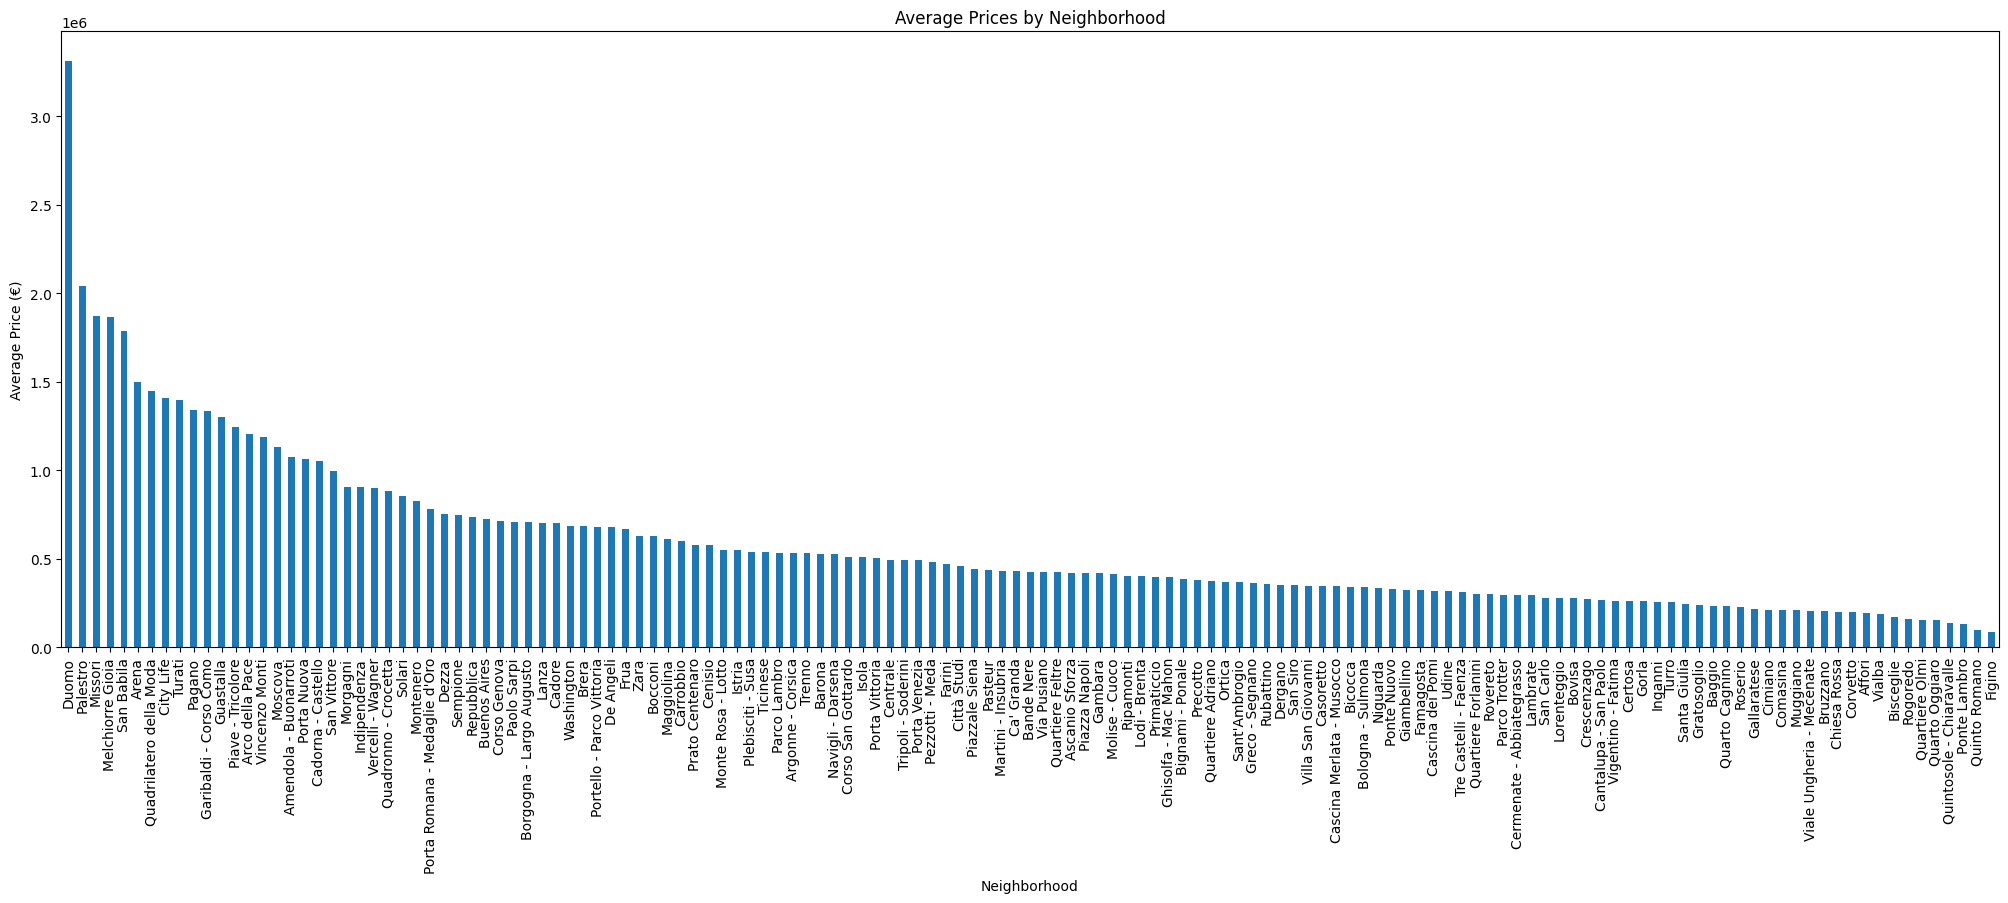

In [ ]:
# Bar Plot
plt.figure(figsize=(25, 8))
average_prices.plot(kind='bar')
plt.title('Average Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=90)
plt.show()

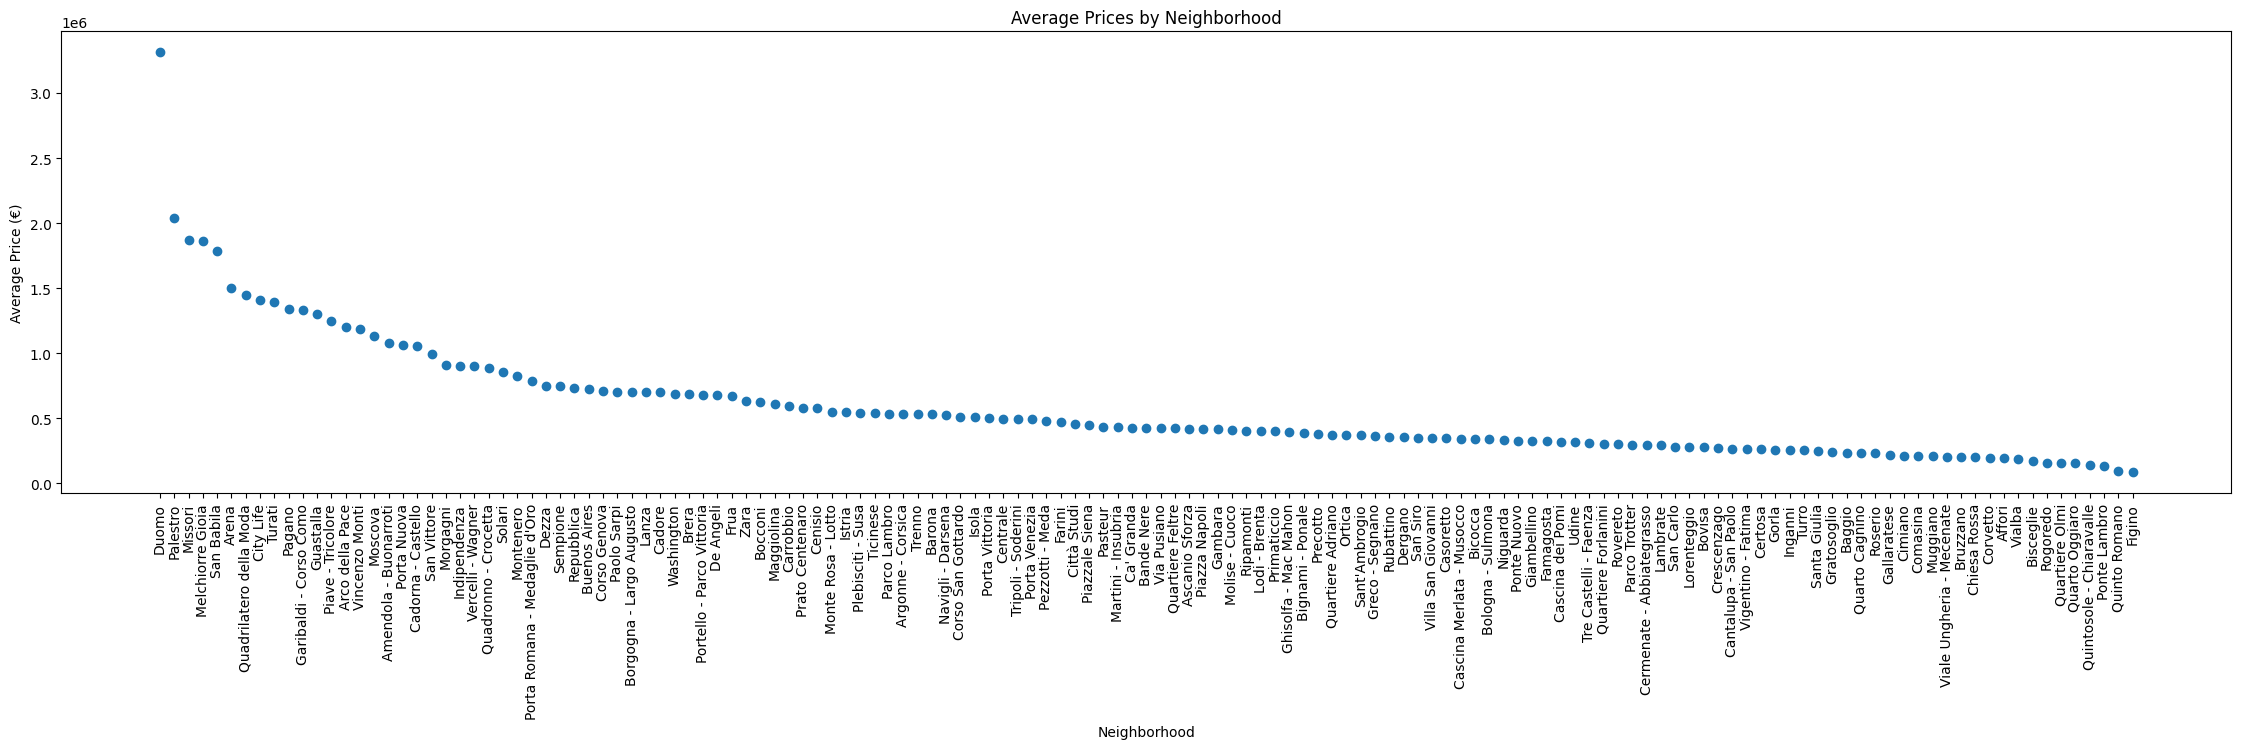

In [ ]:
# Scatter Plot
plt.figure(figsize=(28, 6))
plt.scatter(average_prices.index, average_prices.values)
plt.title('Average Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price (€)')
plt.xticks(rotation=90)
plt.show()

## The count of apartments available in each neighborhood

In [ ]:
df_data['neighborhood'].value_counts()

neighborhood
Città Studi                83
San Siro                   64
Affori                     41
Navigli - Darsena          41
Corvetto                   37
                           ..
Quadrilatero della Moda     1
Parco Lambro                1
Missori                     1
Gorla                       1
Ortica                      1
Name: count, Length: 139, dtype: int64

C:\Users\rashe\AppData\Local\Temp\ipykernel_6244\1039943966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_data, x='neighborhood', palette="mako")
C:\Users\rashe\AppData\Local\Temp\ipykernel_6244\1039943966.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


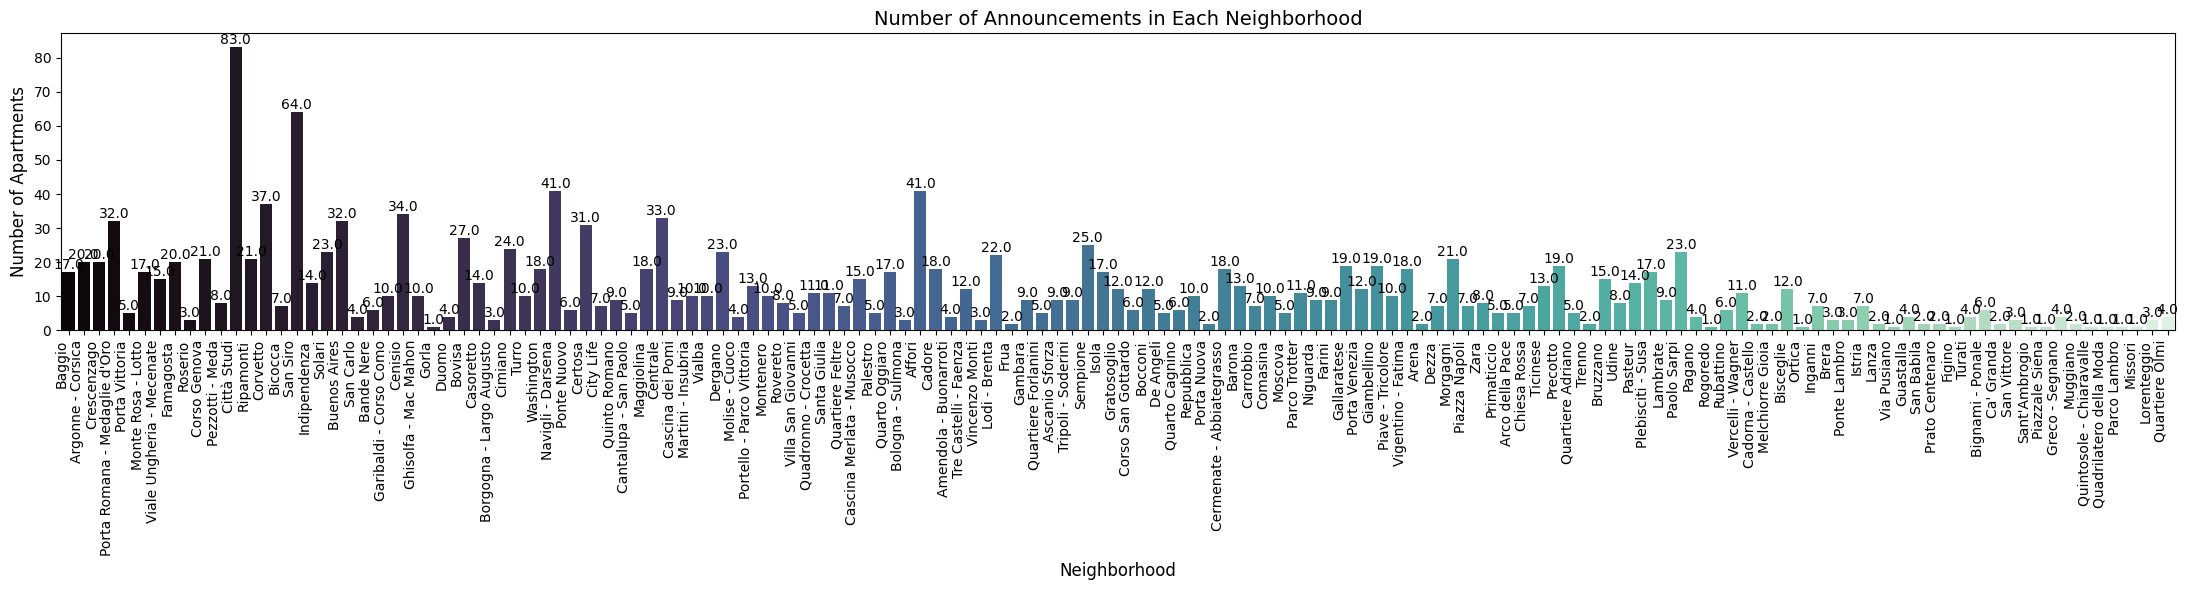

In [ ]:
# Plotting the count of apartments available in each neighborhood using Seaborn countplot.
plt.figure(figsize=(22, 6))
ax = sns.countplot(data=df_data, x='neighborhood', palette="mako")
ax.set_xlabel('Neighborhood', fontsize=12)
ax.set_ylabel('Number of Apartments', fontsize=12)
ax.set_title('Number of Announcements in Each Neighborhood', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add annotations to the bars to display the exact count of apartments in each neighborhood
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


## Apartments that have an elevator

In [ ]:
df_data['with_lift'].value_counts()

with_lift
1    1254
0     362
Name: count, dtype: int64

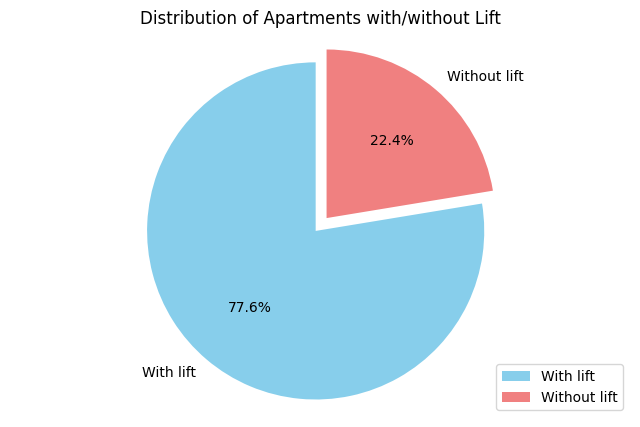

In [ ]:
# Calculate value counts of 'with_lift' column
lift_counts = df_data['with_lift'].value_counts()

# Plotting the pie chart with labels and percentage values
plt.figure(figsize=(8, 5))
plt.pie(lift_counts, labels=labels, autopct='%1.1f%%', explode=(0.1, 0), startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Apartments with/without Lift')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc="lower right")
plt.show()


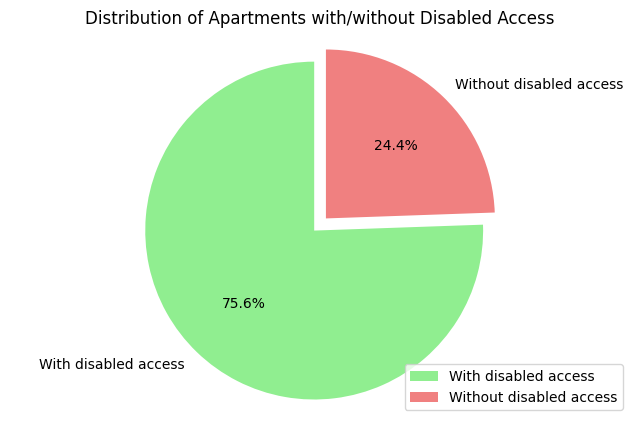

In [ ]:
# Calculate value counts of 'with_disabled_access' column
access_counts = df_data['with_disabled_access'].value_counts()
my_labels = ['With disabled access', 'Without disabled access']

# Plotting the pie chart with labels, percentages, and explosion
plt.figure(figsize=(8, 5))
plt.pie(access_counts, labels=my_labels, autopct='%1.1f%%', explode=(0.1, 0), startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Apartments with/without Disabled Access')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend(loc="lower right")
plt.show()
